# Project Report

A report on my solution to Udacity's DRL Navigation Project. There are many like it but this one is mine.

## What Algorithm?

So, I started off with Double DQN then implemented PER. But the results from using PER just weren't great, in fact performance was consistently worse than without. So, after spending far too long tinkering with PER hyper-parameters I set alpha to 0 and beta to 1 (effectively switching PER off) then carried on.

Next thing to try was implementing Dueling DQN, and sure enough this made a significant difference. So, my final implementation uses Dueling and Double DQN (with the hyper-params below). The policy is epsilon-greedy (obvs) with an epsilon value starting at 1 and decaying through a multiplier of 0.9, to a minimum value of 0.01. (In our original exercise, epsilon was set to decay much more slowly. Incorporating Dueling netorks, I found that I could shift from exporation to exploitation much faster.)

All of this solves in ~300 episodes. Hurrah!

In [ ]:
# Hyper-params, clipped directly from the Agent module

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate 
UPDATE_EVERY = 4        # how often to update the network

Model architectures! For both target and expected action values look like this.

In [3]:
from model import DuelingQNetwork

# from the Banana environment
state_size = 37
action_size = 4

model = DuelingQNetwork(state_size, action_size, seed=0)
print(model)

DuelingQNetwork(
  (features): Sequential(
    (f-fc1): Linear(in_features=37, out_features=128, bias=True)
    (f-relu1): ReLU()
    (f-fc2): Linear(in_features=128, out_features=128, bias=True)
    (f-relu2): ReLU()
  )
  (values): Sequential(
    (v-fc1): Linear(in_features=128, out_features=128, bias=True)
    (v-relu1): ReLU()
    (v-fc2): Linear(in_features=128, out_features=1, bias=True)
  )
  (advantages): Sequential(
    (a-fc1): Linear(in_features=128, out_features=128, bias=True)
    (a-relu1): ReLU()
    (a-fc2): Linear(in_features=128, out_features=4, bias=True)
  )
)


And the results… plots of the actual per-episode score, plus the smoothed 100-episode rolling mean score:

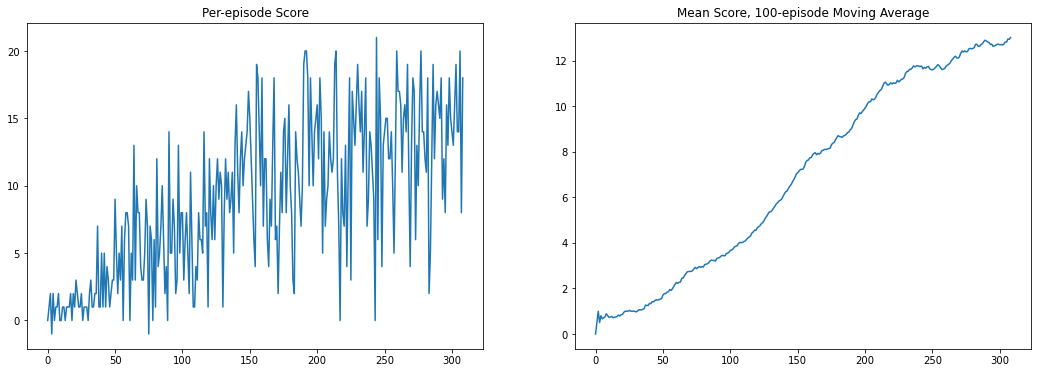

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
ax1.plot(np.load('scores.npy'))
ax1.set_title('Per-episode Score')
ax2.plot(np.load('mean_scores.npy'))
ax2.set_title('Mean Score, 100-episode Moving Average')

plt.show()

## Where Next?

Other than the obligatory Rainbow-ing, there are a couple of things which I thought might be interesting to explore:

1. Experimenting further with the model. Could be wrong, but I seem to remember reading somewhere that no-one really uses dropout in their estimator models. Figure it could make for an improvement though, seeing as increasing the overall capacity of the network – by increasing the output size of the feature layers for instance – leads very quickly to overfitting, and IMO dropout often helps to combat that.

2. Better exploration of hyper-param values. I'm doing this on my home computer, tinkering with the hyper-parameters and running a single experiment at a time which is massively ineffecient. A more rigourous appoach would entail throwing everything onto a cloud cluster and running parallel experiments to efficiently explore the hyper-param space.

3. Try and squeeze some actual improvement out of using PER? Pff.